In [ ]:
# Importing necessary libraries for data analysis, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/AI dataset/loan_data.csv.csv')

# Quick look at the data
print("Data Head:")
print(df.head())
print("\nData Info:")
print(df.info())


Data Head:
   person_age person_gender person_education  person_income  person_emp_exp  \
0          22        female           Master          71948               0   
1          21        female      High School          12282               0   
2          25        female      High School          12438               3   
3          23        female         Bachelor          79753               0   
4          24          male           Master          66135               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT      35000    PERSONAL          16.02   
1                   OWN       1000   EDUCATION          11.14   
2              MORTGAGE       5500     MEDICAL          12.87   
3                  RENT      35000     MEDICAL          15.23   
4                  RENT      35000     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                           3     

In [ ]:
# Check basic statistics for numeric columns
print("Statistical Summary:")
print(df.describe())


Statistical Summary:
        person_age  person_income  person_emp_exp     loan_amnt  \
count  5716.000000    5716.000000     5716.000000   5716.000000   
mean     23.585549   61041.123163        1.667775   8299.715710   
std       3.290889   42217.952306        3.446075   6836.667552   
min      20.000000   12231.000000        0.000000    500.000000   
25%      22.000000   37529.500000        0.000000   3500.000000   
50%      23.000000   49248.000000        1.000000   5000.000000   
75%      25.000000   68504.500000        3.000000  11200.000000   
max     144.000000  600891.000000      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count    5716.000000          5716.000000                 5716.000000   
mean       11.141977             0.147318                    2.989853   
std         3.052693             0.099781                    0.820922   
min         5.420000             0.000000                    2.000000   
25%       

In [ ]:


# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


Columns in the dataset:
Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


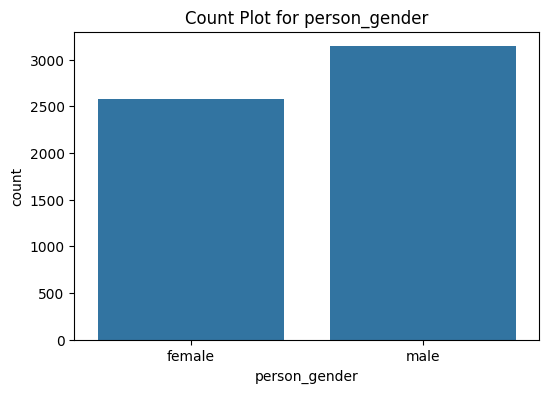

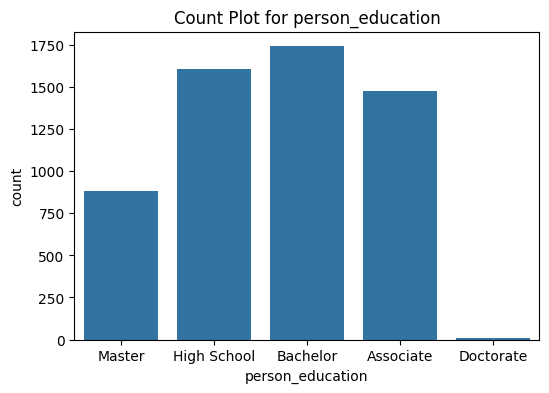

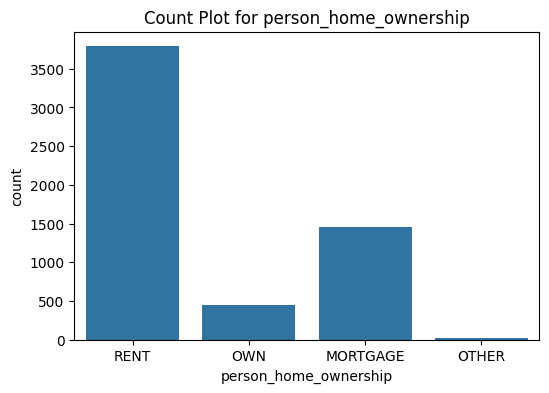

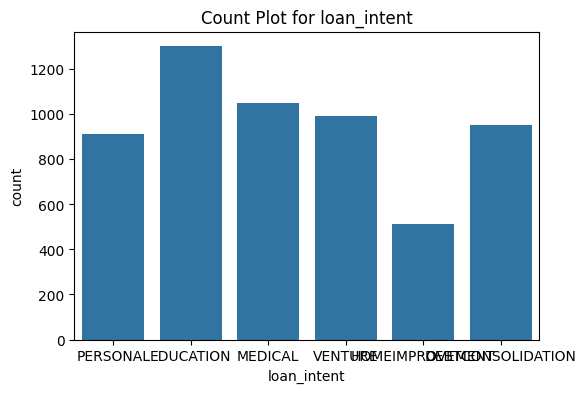

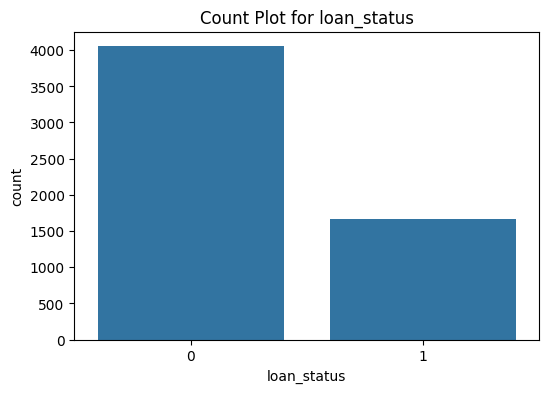

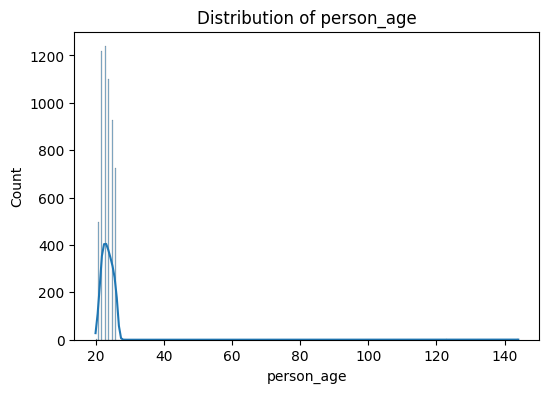

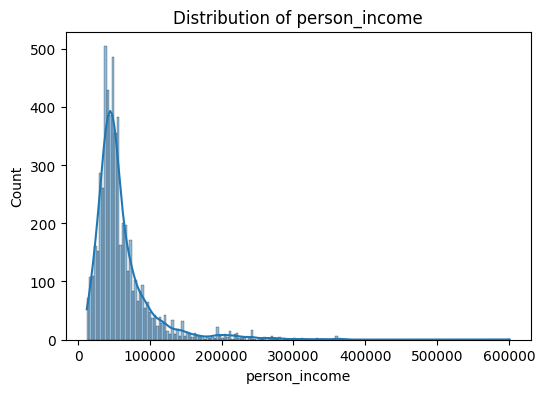

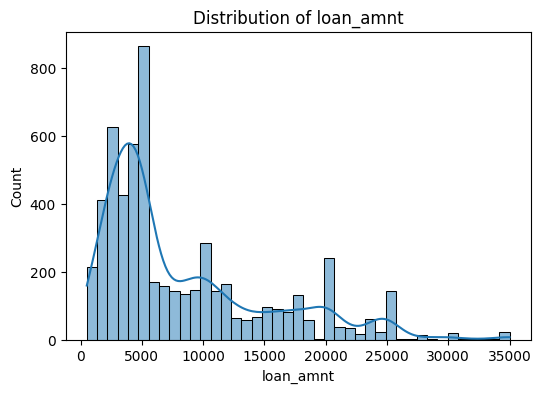

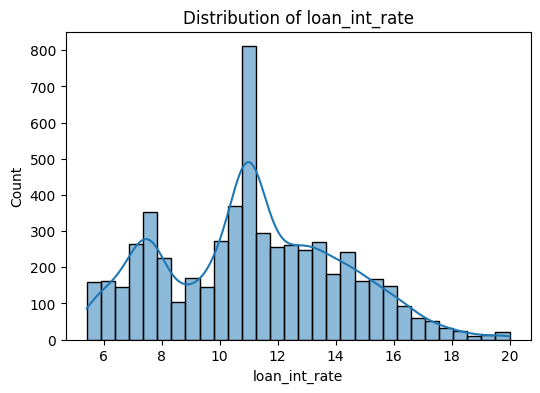

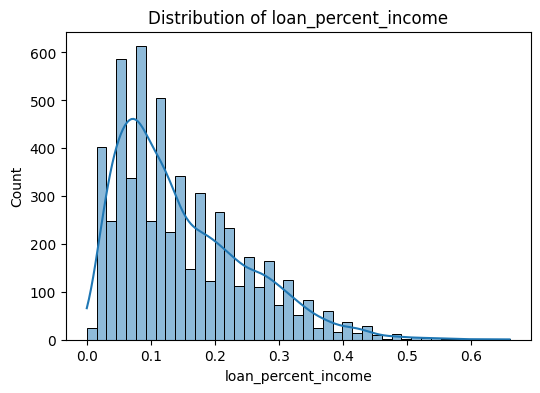

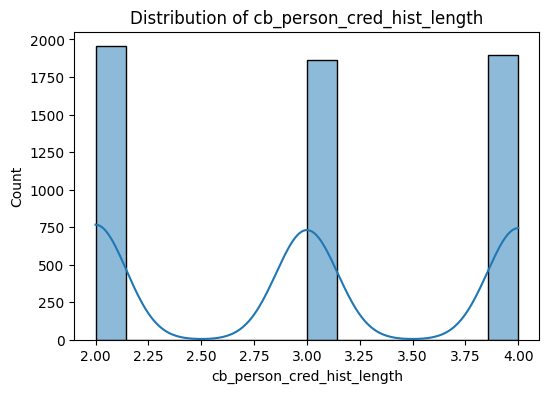

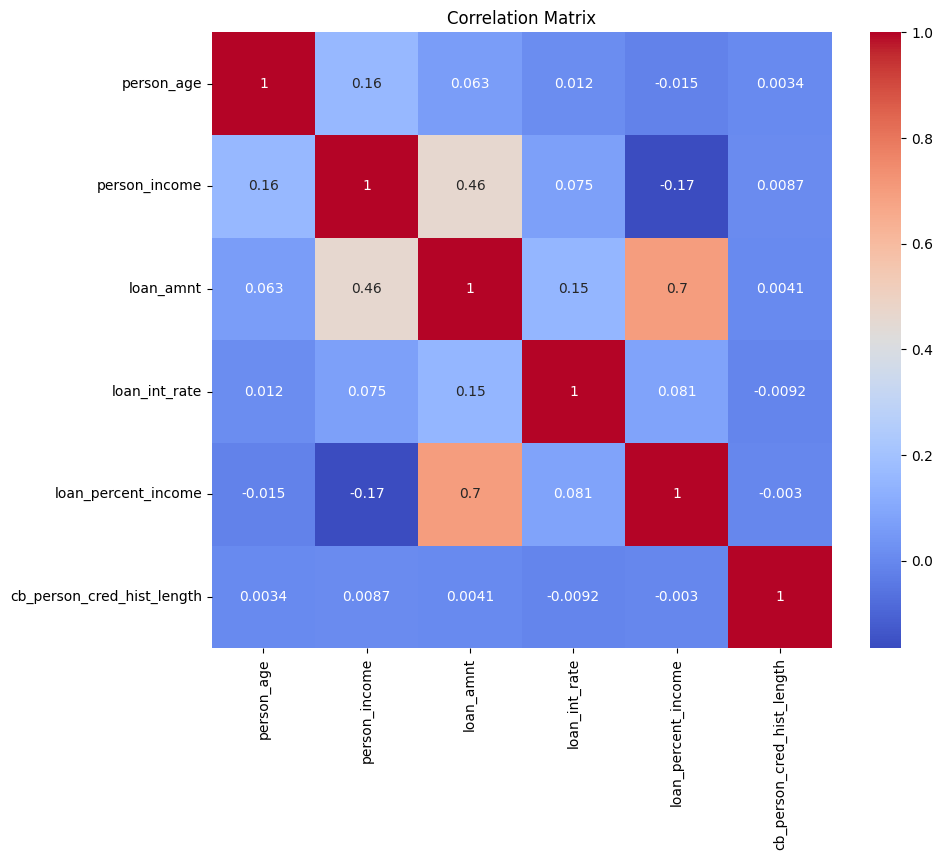

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the actual columns in the dataset
print("Columns in the dataset:")
print(df.columns)

# Update categorical columns to match the exact column names in the dataset
categorical_cols = [
    'person_gender',  # Gender of the person
    'person_education',  # Education level of the person
    'person_home_ownership',  # Home ownership status
    'loan_intent',  # Purpose of the loan
    'loan_status'  # Status of the loan (approved/rejected)
]


# Generate count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot for {col}')
    plt.show()

# Numeric columns visualization
numeric_cols = [
    'person_age',  # Age of the person
    'person_income',  # Income of the person
    'loan_amnt',  # Loan amount
    'loan_int_rate',  # Loan interest rate
    'loan_percent_income',  # Loan amount as a percentage of income
    'cb_person_cred_hist_length'  # Length of credit history
]

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation matrix visualization
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Map target variable 'Loan_Status' (assumed to be 'Y'/'N') to binary (1/0)
df['loan_status'] = df['loan_status'].map({'Y': 1, 'N': 0})

# Convert remaining categorical columns into dummy/indicator variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Optimal Parameters (Theta): [9582.74383869 1525.96888825  920.12825853  -10.80324446   14.71291679]
Final Cost: 18344423.68169814
Model Accuracy: 7.99%


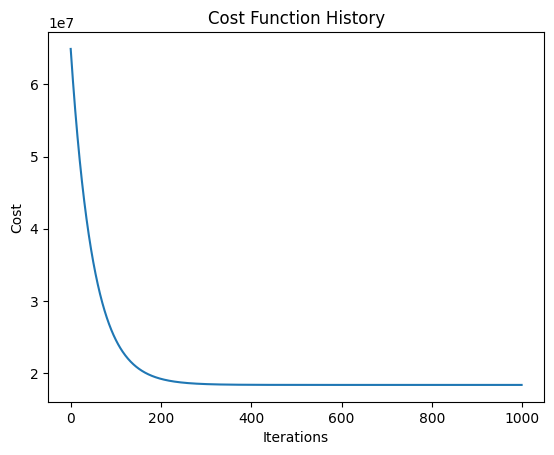

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


# Select relevant features and target
target_column = 'loan_amnt'
X = data[['person_income', 'loan_int_rate', 'credit_score', 'person_age']].values
y = data[target_column].values

# Normalize features for better convergence
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std

# Append ones for the bias term (intercept)
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

# Initialize weights
theta = np.zeros(X_normalized.shape[1])

# Define hyperparameters
learning_rate = 0.01
iterations = 1000

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Train the model
theta_optimal, cost_history = gradient_descent(X_normalized, y, theta, learning_rate, iterations)

# Display results
print("Optimal Parameters (Theta):", theta_optimal)
print("Final Cost:", cost_history[-1])

# Make predictions
y_pred = X_normalized.dot(theta_optimal)

# Calculate accuracy using R-squared metric
accuracy = r2_score(y, y_pred) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Optional: Plot the cost history
import matplotlib.pyplot as plt
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function History")
plt.show()


Model 1: Linear Regression
Accuracy: 9.66%
Mean Squared Error: 36361807.40

Model 2: Random Forest Regressor
Accuracy: 20.87%
Mean Squared Error: 31849856.07

Random Forest Regressor performed better.


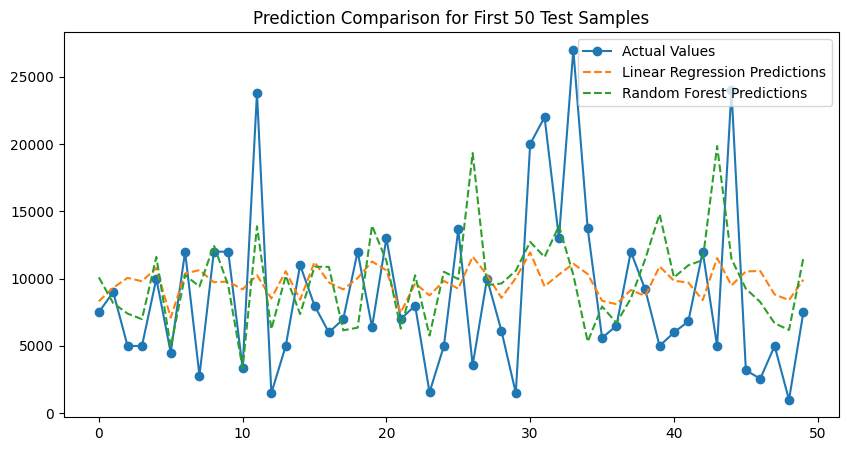

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Select relevant features and target
target_column = 'loan_amnt'
X = data[['person_income', 'loan_int_rate', 'credit_score', 'person_age']]
y = data[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
accuracy_1 = r2_score(y_test, y_pred_1) * 100
mse_1 = mean_squared_error(y_test, y_pred_1)

# Model 2: Random Forest Regressor
model_2 = RandomForestRegressor(random_state=42)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
accuracy_2 = r2_score(y_test, y_pred_2) * 100
mse_2 = mean_squared_error(y_test, y_pred_2)

# Display results
print("Model 1: Linear Regression")
print(f"Accuracy: {accuracy_1:.2f}%")
print(f"Mean Squared Error: {mse_1:.2f}\n")

print("Model 2: Random Forest Regressor")
print(f"Accuracy: {accuracy_2:.2f}%")
print(f"Mean Squared Error: {mse_2:.2f}\n")

# Determine the better model
if accuracy_1 > accuracy_2:
    print("Linear Regression performed better.")
else:
    print("Random Forest Regressor performed better.")

# Optional: Plot predictions comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual Values", marker='o')
plt.plot(y_pred_1[:50], label="Linear Regression Predictions", linestyle='--')
plt.plot(y_pred_2[:50], label="Random Forest Predictions", linestyle='--')
plt.legend()
plt.title("Prediction Comparison for First 50 Test Samples")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Model 1: Linear Regression
Cross-Validation Scores (R^2): [0.10396027 0.07078849 0.02945393 0.08666521 0.05020833]
Mean Cross-Validation Score: 0.07
Accuracy: 9.66%
Mean Squared Error: 36361807.40

Model 2: Random Forest Regressor
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 20}
Accuracy: 23.23%
Mean Squared Error: 30899039.11

Random Forest Regressor performed better.


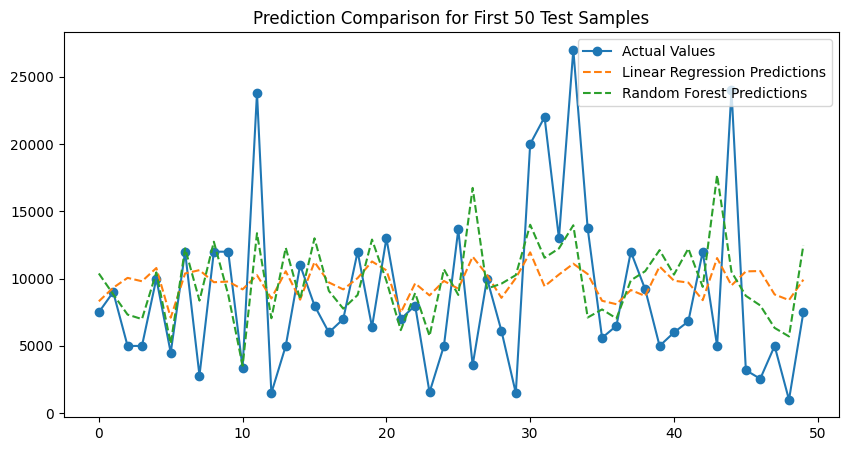

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


# Select relevant features and target
target_column = 'loan_amnt'
X = data[['person_income', 'loan_int_rate', 'credit_score', 'person_age']]
y = data[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression with Cross-Validation
model_1 = LinearRegression()
cross_val_scores_1 = cross_val_score(model_1, X_train, y_train, cv=5, scoring='r2')
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
accuracy_1 = r2_score(y_test, y_pred_1) * 100
mse_1 = mean_squared_error(y_test, y_pred_1)

# Model 2: Random Forest Regressor with Hyperparameter Optimization
param_grid_2 = {
    'n_estimators': [10, 20],
    'max_depth': [5, 10],
    'min_samples_split': [1, 2]
}

model_2 = RandomForestRegressor(random_state=42)
grid_search_2 = GridSearchCV(model_2, param_grid_2, cv=5, scoring='r2', n_jobs=-1)
grid_search_2.fit(X_train, y_train)
best_params_2 = grid_search_2.best_params_
y_pred_2 = grid_search_2.best_estimator_.predict(X_test)
accuracy_2 = r2_score(y_test, y_pred_2) * 100
mse_2 = mean_squared_error(y_test, y_pred_2)

# Display results
print("Model 1: Linear Regression")
print(f"Cross-Validation Scores (R^2): {cross_val_scores_1}")
print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores_1):.2f}")
print(f"Accuracy: {accuracy_1:.2f}%")
print(f"Mean Squared Error: {mse_1:.2f}\n")

print("Model 2: Random Forest Regressor")
print(f"Best Hyperparameters: {best_params_2}")
print(f"Accuracy: {accuracy_2:.2f}%")
print(f"Mean Squared Error: {mse_2:.2f}\n")

# Determine the better model
if accuracy_1 > accuracy_2:
    print("Linear Regression performed better.")
else:
    print("Random Forest Regressor performed better.")

# Optional: Plot predictions comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual Values", marker='o')
plt.plot(y_pred_1[:50], label="Linear Regression Predictions", linestyle='--')
plt.plot(y_pred_2[:50], label="Random Forest Predictions", linestyle='--')
plt.legend()
plt.title("Prediction Comparison for First 50 Test Samples")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model 1: Linear Regression with Cross-Validation
model_1 = LinearRegression()
cross_val_scores_1 = cross_val_score(model_1, X_train, y_train, cv=5, scoring='r2')
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
accuracy_1 = r2_score(y_test, y_pred_1) * 100
mse_1 = mean_squared_error(y_test, y_pred_1)

# Model 2: Random Forest Regressor with Hyperparameter Optimization and Cross-Validation
param_grid_2 = {
    'n_estimators': [10, 20],
    'max_depth': [1,2],
    'min_samples_split': [1,2]
}

model_2 = RandomForestRegressor(random_state=42)
grid_search_2 = GridSearchCV(model_2, param_grid_2, cv=5, scoring='r2', n_jobs=-1)
grid_search_2.fit(X_train, y_train)

# Best Hyperparameters from GridSearchCV for Random Forest
best_params_2 = grid_search_2.best_params_

# Evaluating the model with best hyperparameters
y_pred_2 = grid_search_2.best_estimator_.predict(X_test)
accuracy_2 = r2_score(y_test, y_pred_2) * 100
mse_2 = mean_squared_error(y_test, y_pred_2)

# Display results
print("Model 1: Linear Regression with Cross-Validation")
print(f"Cross-Validation Scores (R^2): {cross_val_scores_1}")
print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores_1):.2f}")
print(f"Accuracy: {accuracy_1:.2f}%")
print(f"Mean Squared Error: {mse_1:.2f}\n")

print("Model 2: Random Forest Regressor with Hyperparameter Optimization")
print(f"Best Hyperparameters: {best_params_2}")
print(f"Accuracy: {accuracy_2:.2f}%")
print(f"Mean Squared Error: {mse_2:.2f}\n")

# Determine the better model
if accuracy_1 > accuracy_2:
    print("Linear Regression performed better.")
else:
    print("Random Forest Regressor performed better.")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Model 1: Linear Regression with Cross-Validation
Cross-Validation Scores (R^2): [0.10396027 0.07078849 0.02945393 0.08666521 0.05020833]
Mean Cross-Validation Score: 0.07
Accuracy: 9.66%
Mean Squared Error: 36361807.40

Model 2: Random Forest Regressor with Hyperparameter Optimization
Best Hyperparameters: {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 20}
Accuracy: 18.25%
Mean Squared Error: 32906508.91

Random Forest Regressor performed better.


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Feature Selection for Model 1 (Linear Regression)
# Using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model_1, n_features_to_select=3)  # Selecting top 3 features
rfe.fit(X_train, y_train)

# Selected features for Linear Regression
selected_features_1 = X_train.columns[rfe.support_]
print("Selected Features for Model 1 (Linear Regression):", selected_features_1)

# Feature Selection for Model 2 (Random Forest Regressor)
# Using Random Forest feature importance
model_2.fit(X_train, y_train)

# Get feature importances
importances = model_2.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]  # Sorting features by importance in descending order
sorted_features_2 = X_train.columns[indices]

# Display sorted features by importance
print("Sorted Features for Model 2 (Random Forest Regressor):")
for i in range(len(sorted_features_2)):
    print(f"{sorted_features_2[i]} - Importance: {importances[indices[i]]:.4f}")

Selected Features for Model 1 (Linear Regression): Index(['loan_int_rate', 'credit_score', 'person_age'], dtype='object')
Sorted Features for Model 2 (Random Forest Regressor):
person_income - Importance: 0.4411
loan_int_rate - Importance: 0.2346
credit_score - Importance: 0.1972
person_age - Importance: 0.1271


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Final Model: Random Forest Regressor with Best Hyperparameters and Best Subset of Features
# Using the best hyperparameters from GridSearchCV
best_model = RandomForestRegressor(
    n_estimators=best_params_2['n_estimators'],
    max_depth=best_params_2['max_depth'],
    min_samples_split=best_params_2['min_samples_split'],
    random_state=42
)

# Using the top 3 important features from Random Forest feature importance
X_train_final = X_train[selected_features_1]  # We select the features based on RFE or SelectKBest
X_test_final = X_test[selected_features_1]

# Train the model with the best hyperparameters and selected features
best_model.fit(X_train_final, y_train)

# Predictions
y_pred_final = best_model.predict(X_test_final)

# Evaluate Model Performance
accuracy_final = r2_score(y_test, y_pred_final) * 100
mse_final = mean_squared_error(y_test, y_pred_final)

# Display Results
print("Final Model: Random Forest Regressor with Best Hyperparameters and Best Features")
print(f"Accuracy (R^2): {accuracy_final:.2f}%")
print(f"Mean Squared Error: {mse_final:.2f}")

# Compare with the previous Random Forest Model performance
print("\nPerformance Comparison:")
print(f"Previous Model Accuracy (R^2): {accuracy_2:.2f}%")
print(f"Previous Model MSE: {mse_2:.2f}")

# Did the model improve?
if accuracy_final > accuracy_2:
    print("\nThe model performance improved with the final model.")
else:
    print("\nThe model performance did not improve.")


Final Model: Random Forest Regressor with Best Hyperparameters and Best Features
Accuracy (R^2): 2.59%
Mean Squared Error: 39209076.06

Performance Comparison:
Previous Model Accuracy (R^2): 18.25%
Previous Model MSE: 32906508.91

The model performance did not improve.
